In [1]:
#CNN

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D


In [57]:
# download the dataset
(Xtrain,Ytrain),(Xtest,Ytest)=tf.keras.datasets.cifar10.load_data()

In [3]:
#data shape:
print(f"Xtrain's shape ==> {Xtrain.shape}\nXtest's shape ==>{Xtest.shape}")

train's shape ==> (50000, 32, 32, 3)
test's shape ==>(10000, 32, 32, 3)


- images size ==> (32*32)
- color mode ==> RGB
- count of train dataset ==> 50000


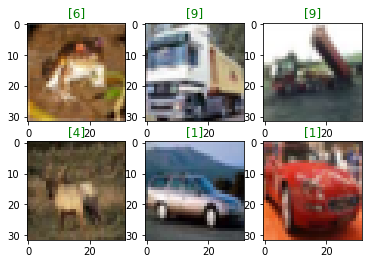

In [28]:
#visit a image from dataset
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(Xtrain[i])
    plt.title(Ytrain[i],color="green")


کلاس بندی به صورت زیر است
- 0: هواپیما
- 1: ماشین
- 2: پرنده
- 3: گربه
- 4: گوزن
- 5: سگ
- 6: قورباغه
- 7: اسب
- 8: کشتی
- 9: کامیون

In [58]:
# convert Y datasets to 'one hot'
Ytest = tf.keras.utils.to_categorical(Ytest,10)
Ytrain = tf.keras.utils.to_categorical(Ytrain,10)


C:\Users\www.srctabriz.ir\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


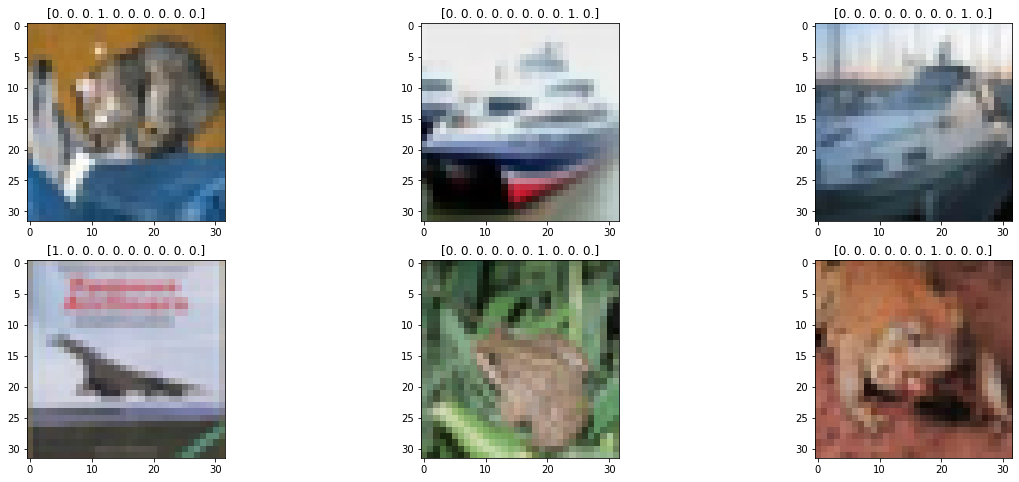

In [48]:
plt.figure(figsize=(20,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(Xtest[i])
    plt.title(Ytest[i])

In [59]:
Xtest.max()

255

### هر پیکسل بین 0 تا 255 مقدار دهی شده است


In [60]:
#Data Normalization
Xtest = Xtest/255

In [62]:
Xtrain = Xtrain/255
Xtrain.max()

1.0

In [66]:
# Model Building
model = tf.keras.Sequential()
model.add(Conv2D(8,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(Conv2D(8,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(16,(3,3),activation="relu"))
model.add(Conv2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)         

In [67]:
#CallBack
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)
callbacks = [earlystop, learning_rate_reduction]

In [76]:
# model.compile(optimizer="adam",
# loss="categorical_crossentropy",
# metrics=["accuracy"])

# model.fit(Xtrain,Ytrain,batch_size=32,validation_split=0.2,
#     epochs=500,callbacks=callbacks)

### کد بالا را در کولب ران کرده و وزن های بدست آمده را سیو کردیم
### این وزن ها را در کد پایین لود کردیم

In [138]:
model = tf.keras.models.load_model("mymodel.h5")

In [139]:
model.evaluate(Xtest,Ytest)

313/313 [==============================] - 2s 7ms/step - loss: 0.8344 - accuracy: 0.7130


[0.8344269394874573, 0.7129999995231628]

### تست کردن مدل روی یک تصویر از گوگل

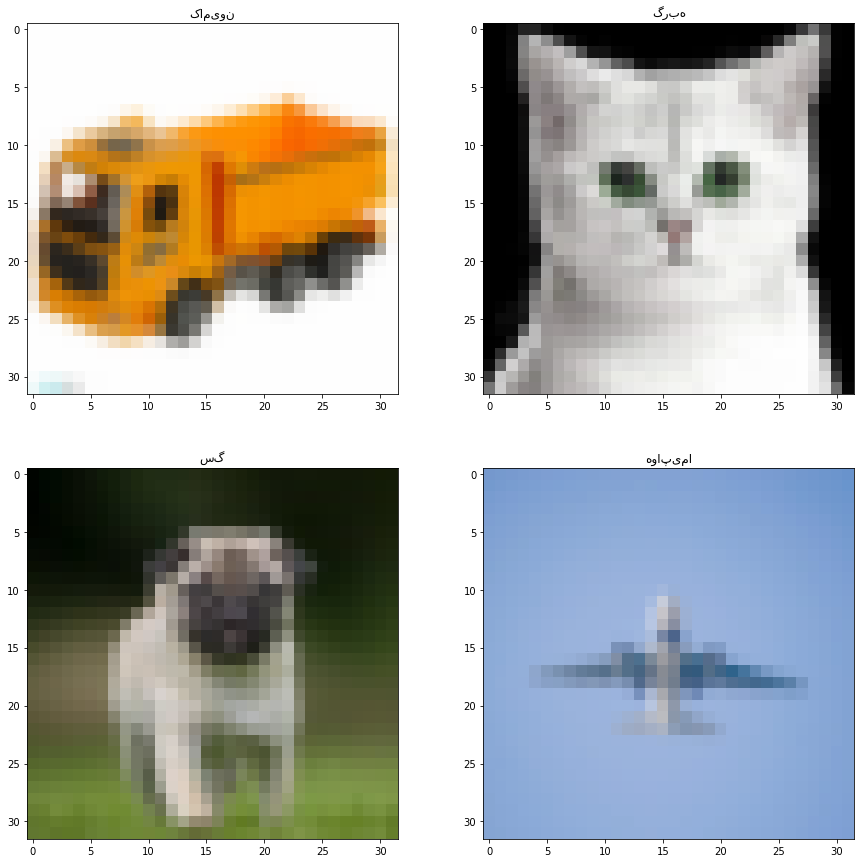

In [185]:
from skimage.transform import resize

classes = ["هواپیما" ,"خودرو" ,"پرنده", "گربه" ,
    "گوزن" ,"سگ" ,"قورباغه", "اسب" ,"کشتی", "کامیون"]

figure = plt.figure(figsize=(15,15))
for i in range(4):  #چهار عکس از گوگل دانلود کردیم
    im = plt.imread(f"sample {i}.jpg") #خواندن تصواویر
    im = resize(im,(32,32,3))  #تغییر سایز تصاویر برای اینکه بتوان در مدل استفاده شوند
    pred = model.predict(np.array([im,])) #تشخیص کلاس توسط مدل
    plt.subplot(2,2,i+1)  
    plt.imshow(im) 
    plt.title(classes[np.argmax(pred)]) #چاپ کلاس تشخیص داده شده در بالای تصاویر

### متن ها بصورت برعکس نوشته شدند